In [1]:
# Import the required libraries and modules that you would need
import pandas as pd
import numpy as np
#import scipy.stats as st
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
# Read that data into Python and call the dataframe churnData
churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
# Check the datatypes of all the columns in the data
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
# Convert the column TotalCharges into numeric type using pd.to_numeric function
churnData['TotalCharges'] =  pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [6]:
# Check for null values in the dataframe. Replace the null values
churnData.isnull().sum()/len(churnData)

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

<AxesSubplot:>

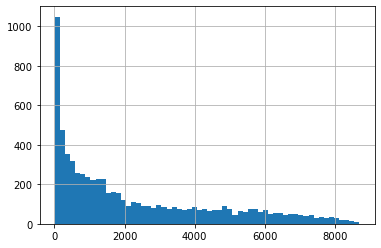

In [7]:
churnData['TotalCharges'].hist(bins=60)

In [8]:
# Very small amount of nulls. I'm going to replace it by the mean
mean_total_charges=churnData['TotalCharges'].mean()
mean_total_charges

2283.3004408418697

In [9]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_total_charges)

In [10]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges
X=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [11]:
X.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


In [12]:
# Scale the features either by using normalizer or a standard scaler. I'm going to use standard scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
x_scaled = transformer.transform(X)

In [13]:
# Split the data into a training set and a test set
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
y=churnData['Churn'].apply(lambda x: 0 if x=='No' else 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Fit a logistic regression model on the training data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [17]:
# Check the accuracy on the test data
from sklearn.metrics import confusion_matrix
pred = LR.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[959,  77],
       [194, 179]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.69921875
recall:  0.47989276139410186
f1:  0.5691573926868044


In [19]:
# Low value for recall (only 48%) so 52% of the times we are failing to predict churn

In [20]:
# Check for the imbalance
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
# 'No' represents almost 73.5% of values, so there is an important imbalance

In [22]:
# Use the resampling strategies used in class for upsampling and downsampling to create a balance 
# between the two classes.
from sklearn.utils import resample

In [23]:
X_train_scaled_df=pd.DataFrame(X_train_scaled, columns=X.columns)

In [24]:
y_train_df=pd.DataFrame(y_train).reset_index()

In [25]:
churnData_temp=pd.concat((X_train_scaled_df, y_train_df), axis=1)

In [26]:
churnData_temp.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,index,Churn
0,-0.463037,-0.439916,0.002935,-4.179106e-01,2142,0
1,0.880735,-0.439916,1.078118,1.256667e+00,1623,0
2,-1.277445,-0.439916,-1.373033,-9.977972e-01,6074,1
3,-1.155283,-0.439916,0.180747,-9.030885e-01,1362,1
4,-1.318165,-0.439916,-0.095111,1.807071e-15,6754,0


In [27]:
# Creating a dataframe for each category
category_0 = churnData_temp[churnData_temp['Churn'] == 0]
category_1 = churnData_temp[churnData_temp['Churn'] == 1]

In [28]:
# Downsampling
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [29]:
print(category_0_undersampled.shape)
print(category_1.shape)

(1496, 6)
(1496, 6)


In [30]:
train_downsampled = pd.concat([category_0_undersampled, category_1])
y_train_down = train_downsampled['Churn']
X_train_down = train_downsampled.drop(['Churn', 'index'],axis = 1)

In [31]:
X_train_down

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
3444,-1.277445,-0.439916,-1.354753,-0.997554
1752,1.613701,-0.439916,0.946836,1.945237
1771,-0.381597,-0.439916,0.476547,-0.220568
3825,1.084337,-0.439916,1.172840,1.656431
882,-0.422317,-0.439916,0.797274,-0.175796
...,...,...,...,...
5621,-1.277445,2.273159,0.386810,-0.974418
5624,0.677133,-0.439916,1.435404,1.328968
5628,-1.277445,-0.439916,-1.318194,-0.997069
5629,-1.277445,-0.439916,1.004999,-0.966206


In [32]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_down, y_train_down)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5061946902654867
recall:  0.7667560321715817
f1:  0.6098081023454157


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
confusion_matrix(y_test, pred)

array([[757, 279],
       [ 87, 286]], dtype=int64)

In [34]:
# Upsampling
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [35]:
print(category_0.shape)
print(category_1_oversampled.shape)

(4138, 6)
(4138, 6)


In [36]:
train_oversampled = pd.concat([category_0, category_1_oversampled])
y_train_up = train_oversampled['Churn']
X_train_up = train_oversampled.drop(['Churn', 'index'],axis = 1)

In [37]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_up, y_train_up)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5088652482269503
recall:  0.7694369973190348
f1:  0.6125933831376734


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
confusion_matrix(y_test, pred)

array([[759, 277],
       [ 86, 287]], dtype=int64)

In [ ]:
# Using downsampling and upsampling we get very similar results. After balancing, precision is lower
# but recall parameter is much better (0.772 from previous 0.479) 